In [6]:
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.cm as cm
%matplotlib notebook

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

In [7]:
df['mean'] = df.mean(axis = 1)

In [8]:
df['std'] = df.std(axis = 1)

In [9]:
df['confidence interval'] = 1.96 * (df['std']/np.sqrt(3650))

<IPython.core.display.Javascript object>


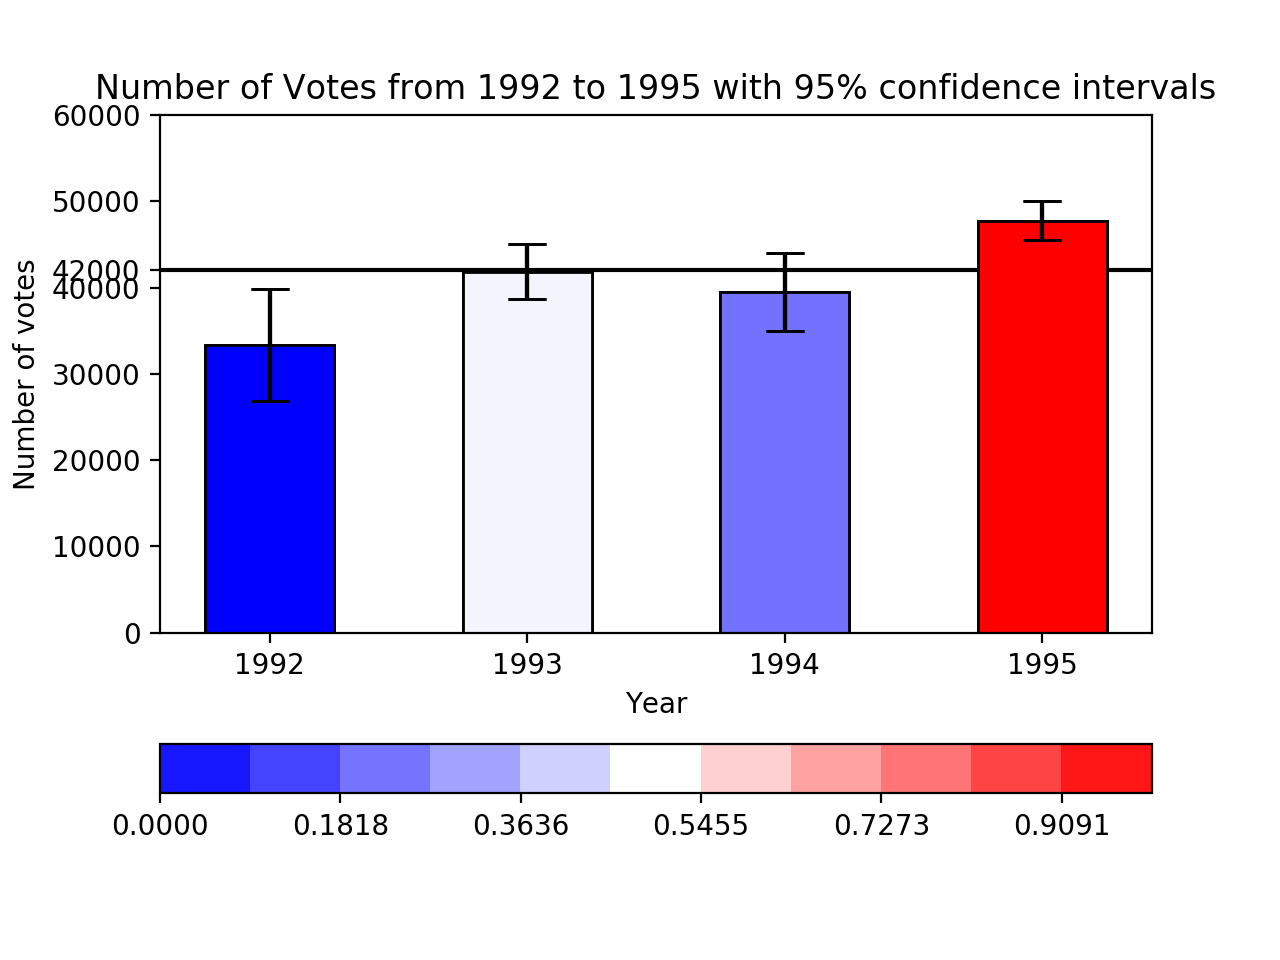

In [10]:
plt.figure()

ax = plt.gca()

bars = plt.bar(range(df.shape[0]), df['mean'], width = 0.5, color = 'blue', edgecolor = 'black', yerr=df['confidence interval'], capsize=7)
plt.title('Number of Votes from 1992 to 1995 with 95% confidence intervals')
plt.xticks(range(len(df.index)), df.index)
plt.ylabel('Number of votes')
plt.xlabel('Year')
plt.axhline(y=42000, zorder=0, color = 'black')
ytick = plt.gca().get_yticks()
ytick = np.append(ytick,42000)
plt.gca().set_yticks(ytick)
ax.set_ylim(0,60000)

colormap = col.LinearSegmentedColormap.from_list("colormap",["blue", "white", "red"])
cpick = cm.ScalarMappable(cmap=colormap)
cpick.set_array([])

percentages = []
for bar, yerr_ in zip(bars, df['confidence interval']):
    low = bar.get_height() - yerr_
    high = bar.get_height() + yerr_
    percentage = (high-42000)/(high-low)
    if percentage>1: percentage = 1
    if percentage<0: percentage=0
    percentages.append(percentage)
percentages

bars = plt.bar(range(df.shape[0]), df['mean'],width = 0.5,edgecolor = 'black', yerr = df['confidence interval'], color = cpick.to_rgba(percentages),capsize=7)

plt.colorbar(cpick, orientation='horizontal', boundaries=np.linspace(0,1,12))

plt.savefig('Week3_Harder Option_Assign2',dpi = 300)

plt.show()
